# Library

In [1]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 42.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 30.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 11.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=3656a92271a912f206779770dc7b272b23d3cbf6f11062bac46ccbb0f714b2d4
  Stored in directory: /root/.cache/pip/wheels/e6/8e/67/e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Library to dataset
import opendatasets as od
import os
import zipfile
import numpy as np

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
# Others
import shutil
import random

# Load dataset

In [4]:
# Download dataset
od.download('https://www.kaggle.com/datasets/ahmadhabibhasanzein/grape-leaves')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ahmadhabibhasanzein


Your Kaggle Key:

  ········


100%|██████████| 223M/223M [00:06<00:00, 37.1MB/s] 


In [5]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "grape-leaves/grape/train",
    label_mode="categorical",
    class_names=['Grape Esca (Black_Measles)','Grape Leaf blight (Isariopsis_Leaf_Spot)','grape leaf Healthy','grape leaf black rot'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "grape-leaves/grape/valid",
    label_mode="categorical",
    class_names=['Grape Esca (Black_Measles)','Grape Leaf blight (Isariopsis_Leaf_Spot)','grape leaf Healthy','grape leaf black rot'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 7335 files belonging to 4 classes.
==========================Validation Data====================
Found 1825 files belonging to 4 classes.


In [6]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("grape-leaves/grape/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("grape-leaves/grape/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 7335 images belonging to 4 classes.
Found 1825 images belonging to 4 classes.


# List Resource

In [7]:
# Check GPU
!nvidia-smi

Thu May 25 04:09:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
|  0%   50C    P2    34W / 170W |  10509MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Lis physical devices
devices = tf.config.experimental.list_physical_devices("GPU")
devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# Define the GPU strategy
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0"])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Modelling Without Augmentation

## DenseNet Model 1

In [10]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Grape_DenseNet_model1_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [11]:
# Define DIY Model
DenseNet_model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])


# Compile Model
DenseNet_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d (Globa  (None, 1024)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 7,217,284
Non-t

In [12]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet_model_1 = DenseNet_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
367/367 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.9429
Epoch 1: val_accuracy improved from -inf to 0.95288, saving model to Grape_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 223s 377ms/step - loss: 0.2657 - accuracy: 0.9429 - val_loss: 0.2162 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 2/100
367/367 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9741
Epoch 2: val_accuracy did not improve from 0.95288
367/367 [==============================] - 64s 174ms/step - loss: 0.0882 - accuracy: 0.9741 - val_loss: 0.2430 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 3/100
367/367 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9891
Epoch 3: val_accuracy improved from 0.95288 to 0.98192, saving model to Grape_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 125s 341ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0661 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 4/100
367/367 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9817
Epoch 4: val_accuracy did not improve from 0.98192
367/367 [==============================] - 63s 173ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.1617 - val_accuracy: 0.9430 - lr: 0.0010
Epoch 5/100
367/367 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9881
Epoch 5: val_accuracy improved from 0.98192 to 0.99233, saving model to Grape_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 124s 337ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0307 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 6/100
367/367 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9890
Epoch 6: val_accuracy did not improve from 0.99233
367/367 [==============================] - 64s 174ms/step - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.0328 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 7/100
367/367 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9937
Epoch 7: val_accuracy improved from 0.99233 to 0.99562, saving model to Grape_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 122s 334ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0125 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 8/100
367/367 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9910
Epoch 8: val_accuracy did not improve from 0.99562
367/367 [==============================] - 64s 174ms/step - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.9749 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 9/100
367/367 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9920
Epoch 9: val_accuracy did not improve from 0.99562
367/367 [==============================] - 64s 174ms/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.0673 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 10/100
367/367 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9857
Epoch 10: val_accuracy did not improve from 0.99562
367/367 [==============================] - 64s 174ms/step - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.6983 -

INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 124s 339ms/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.0159 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 15/100
367/367 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993
Epoch 15: val_accuracy did not improve from 0.99671
367/367 [==============================] - 64s 173ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0096 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 16/100
367/367 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 16: val_accuracy did not improve from 0.99671
367/367 [==============================] - 65s 176ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0114 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 17/100
367/367 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9997
Epoch 17: val_accuracy improved from 0.99671 to 0.99726, saving model to Grape_DenseNet_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model1_Based_Non_Augmented/assets


367/367 [==============================] - 127s 348ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0106 - val_accuracy: 0.9973 - lr: 1.0000e-04
Epoch 18/100
367/367 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 18: val_accuracy did not improve from 0.99726
367/367 [==============================] - 64s 173ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0109 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 19/100
367/367 [==============================] - ETA: 0s - loss: 4.8546e-04 - accuracy: 0.9999
Epoch 19: val_accuracy did not improve from 0.99726
367/367 [==============================] - 64s 174ms/step - loss: 4.8546e-04 - accuracy: 0.9999 - val_loss: 0.0101 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 20/100
367/367 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 20: val_accuracy did not improve from 0.99726

Epoch 20: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
367/367 [

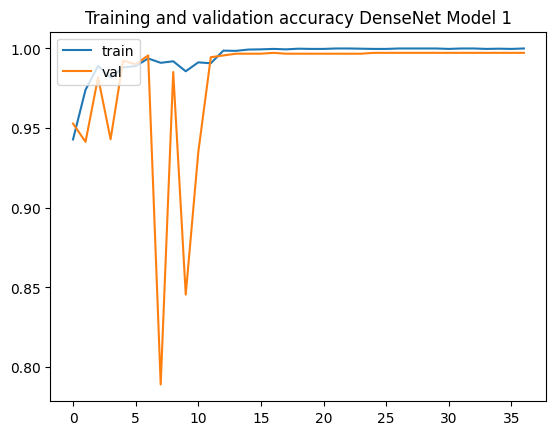

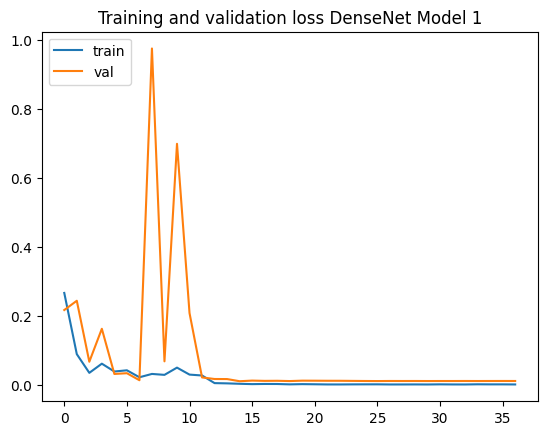

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet_model_1.history['accuracy' ]
val_acc  = history_DenseNet_model_1.history['val_accuracy' ]
loss     = history_DenseNet_model_1.history['loss' ]
val_loss = history_DenseNet_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 1')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 1')
plt.legend(['train', 'val'], loc='upper left')

## DenseNet Model 2

In [14]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Grape_DenseNet_model2_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [15]:
# Define DIY Model
DenseNet_model_2 = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])


# Compile Model
DenseNet_model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 7,217,284
Non-trainable params: 83,648
_______________________________________

In [16]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet_model_2 = DenseNet_model_2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
367/367 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9459
Epoch 1: val_accuracy improved from -inf to 0.92877, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 199s 362ms/step - loss: 0.1695 - accuracy: 0.9459 - val_loss: 0.3053 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 2/100
367/367 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9767
Epoch 2: val_accuracy improved from 0.92877 to 0.94356, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 127s 346ms/step - loss: 0.0785 - accuracy: 0.9767 - val_loss: 0.2092 - val_accuracy: 0.9436 - lr: 0.0010
Epoch 3/100
367/367 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9813
Epoch 3: val_accuracy improved from 0.94356 to 0.98137, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 126s 343ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0579 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 4/100
367/367 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9808
Epoch 4: val_accuracy did not improve from 0.98137
367/367 [==============================] - 64s 174ms/step - loss: 0.0657 - accuracy: 0.9808 - val_loss: 0.1180 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 5/100
367/367 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9894
Epoch 5: val_accuracy improved from 0.98137 to 0.98904, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 126s 345ms/step - loss: 0.0290 - accuracy: 0.9894 - val_loss: 0.0316 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 6/100
367/367 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9830
Epoch 6: val_accuracy did not improve from 0.98904
367/367 [==============================] - 64s 175ms/step - loss: 0.0578 - accuracy: 0.9830 - val_loss: 0.2244 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 7/100
367/367 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9902
Epoch 7: val_accuracy improved from 0.98904 to 0.99507, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 128s 349ms/step - loss: 0.0260 - accuracy: 0.9902 - val_loss: 0.0204 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 8/100
367/367 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9928
Epoch 8: val_accuracy did not improve from 0.99507
367/367 [==============================] - 64s 173ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0387 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 9/100
367/367 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9895
Epoch 9: val_accuracy improved from 0.99507 to 0.99671, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 128s 348ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0110 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 10/100
367/367 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9855
Epoch 10: val_accuracy did not improve from 0.99671
367/367 [==============================] - 64s 173ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0256 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 11/100
367/367 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9917
Epoch 11: val_accuracy did not improve from 0.99671
367/367 [==============================] - 64s 174ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.9094 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 12/100
367/367 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9945
Epoch 12: val_accuracy did not improve from 0.99671
367/367 [==============================] - 64s 174ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.05

INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 126s 344ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0073 - val_accuracy: 0.9978 - lr: 1.0000e-04
Epoch 21/100
367/367 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 21: val_accuracy did not improve from 0.99781
367/367 [==============================] - 64s 173ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0075 - val_accuracy: 0.9973 - lr: 1.0000e-04
Epoch 22/100
367/367 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993
Epoch 22: val_accuracy did not improve from 0.99781
367/367 [==============================] - 64s 174ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0070 - val_accuracy: 0.9978 - lr: 1.0000e-04
Epoch 23/100
367/367 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 23: val_accuracy improved from 0.99781 to 0.99890, saving model to Grape_DenseNet_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Grape_DenseNet_model2_Based_Non_Augmented/assets


367/367 [==============================] - 127s 347ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0070 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 24/100
367/367 [==============================] - ETA: 0s - loss: 4.1629e-04 - accuracy: 1.0000
Epoch 24: val_accuracy did not improve from 0.99890
367/367 [==============================] - 64s 174ms/step - loss: 4.1629e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9978 - lr: 1.0000e-04
Epoch 25/100
367/367 [==============================] - ETA: 0s - loss: 4.2013e-04 - accuracy: 1.0000
Epoch 25: val_accuracy did not improve from 0.99890
367/367 [==============================] - 64s 173ms/step - loss: 4.2013e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9978 - lr: 1.0000e-04
Epoch 26/100
367/367 [==============================] - ETA: 0s - loss: 2.7059e-04 - accuracy: 1.0000
Epoch 26: val_accuracy did not improve from 0.99890
367/367 [==============================] - 64s 174ms/step - loss: 2.7059e-04

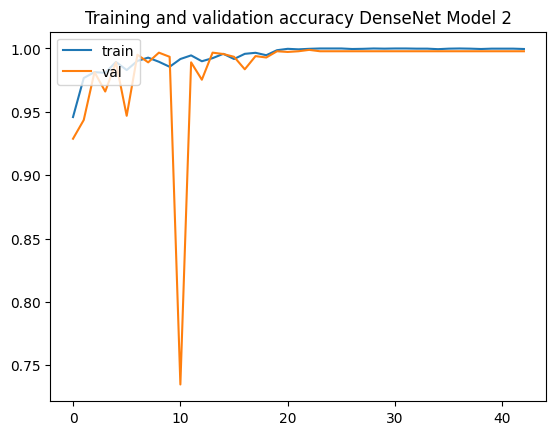

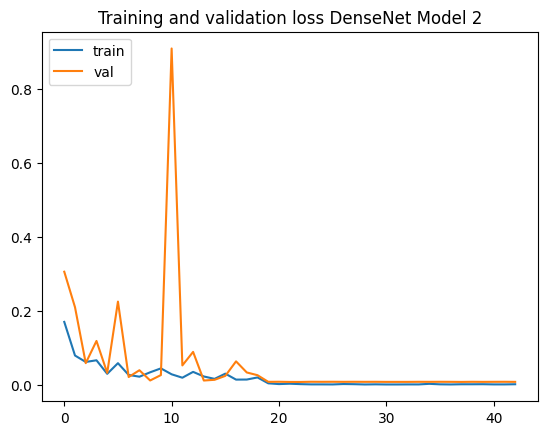

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet_model_2.history['accuracy' ]
val_acc  = history_DenseNet_model_2.history['val_accuracy' ]
loss     = history_DenseNet_model_2.history['loss' ]
val_loss = history_DenseNet_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')